# Sympy

Anaconda Python comes with a package called [Sympy](https://www.sympy.org/en/index.html) which is a shortened term for *Symbolic Python*. Most simply, this package allows the user to analytically solve problems that he might otherwise have to solve numerically in Python. Generally, in the past, most analytical work was done in what is known as a Computer Algebra System (CAS) such as *Mathematica*. While *Mathematica* still remains at the peak of most symbolic representations, tools like Sympy can be a powerful asset in the Physicist's toolbelt.

We'll begin below with a few examples to get an understanding of how Sympy works. Considering I have never used Sympy before, I will be closely following the [Dynamics and Controls in Jupyter Notebooks Tutorial](https://dynamics-and-control.readthedocs.io/en/latest/index.html)

## Imports


In [1]:
# Python
from IPython.display import display

# 3rd Party Imports
import numpy as np
import sympy as sy

## Notebook Setup

It appears that Sympy, be default, does not try to "pretty print" math output. But, Jupyter notebooks can display LaTeX and MathJax equations so we will turn on this sympy feature now.

In [2]:
# Turn on Pretty Print
sy.init_printing()

## Symbol / Variable Creation

Python behaves the same way with Sympy as it does with other aspects of the language. For example, if you attempted to run the line

```python
print(x)
```

without first defining `x`, Python would throw a name error. Therefore, we would have to assign a value to `x` then call the `print` function like the example below.

```python
x = 5
print(x)
```

With the above syntax, we are telling Python to first assign the value of 5 to `x` then recall what `x` represents. Sympy works the same way; however, we will use Sympy to tell the Python interpretter that `x` represents a Symbol. Although, you do not have to know this to know how Sympy works, it may be useful to know that Symbol is simply a class in Sympy and we are simply instantiating an object of that class.

The next cell shows how we might instantiate a Symbol object `x` and print its value.

In [3]:
x = sy.Symbol('x')
y = sy.Symbol('z')
display(x)
display(y)

Now, there are a few things to note from the cell above. On the first line, we initialized a Sympy Symbol called $x$ and stored it into the variable `x`. On the second line, we initialized a Sympy Symbol but $z$ but stored it into a variable called `y`. Note how Python does not care what the variable name is. We could have called the Symbol $z$ `joe` but Python would still interpret that variable `joe` as $z$.

One last thing to notice. Above, I call the IPython function `display` rather than the built in Python function `print`. This is simply bacause pretty printing is not a Python capability. Rather, this is an IPython capability. However, if (like below) you only have to print one thing per cell, IPython will automatically `display` the value for you.

In [4]:
x**2

## Higher Level Examples

We'll next study Sympy's options by looking at the simply mathematical construct: the polynomial. Let's first create and display a polynomial to work with.

In [5]:
# Create the Polynomial
pol = (3*x**2 - x + 1)**2
pol

We can then perform higher level operations on the polynomial by operating directly on the `pol` object.

In [6]:
# Display the Expanded Polynomial
pol.expand()

In [7]:
# Get the First Derivative
pol.diff()

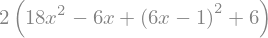

In [8]:
# Get the Second Derivative
pol.diff(x, 2)  # Arg 1: wrt; Arg 2: Second deriv

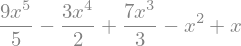

In [9]:
# Get the Indefinite Integral
pol.integrate()

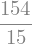

In [10]:
# Get the Definite Integral from -1 to 1
display(pol.integrate((x, -1, 1)))
display(sy.N(pol.integrate((x, -1, 1))))  # As a Decimal Number

We can even use Sympy to get the Taylor Series expansion of expressions.

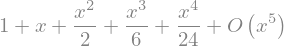

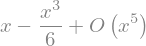

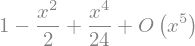

In [11]:
display(sy.series(sy.exp(x), x, 0, 5))  # Expansion of e^x at x=0
display(sy.series(sy.sin(x), x, 0, 5))  # Expansion of sin(x) at x=0
display(sy.series(sy.cos(x), x, 0, 5))  # Expansion of cos(x) at x=0

### Solving a System of Equations

If you know what you are doing, solving a system of equations using a computer is just as easy to do it numerically as it is symbolically. However, it is sometimes nice to solve a system of equations with any arbitrary variables. For example, below we have a system of equations with four unknowns, but we are interested in solving the equations for $x$ and $y$.

One advantage (at least in Python) of solving the system numerically with Numpy is that Numpy is much faster than Sympy. For small systems of equations, this is not of great importance, but if you had many variables then this could become a problem very quickly. See the [Dynamics and Controls - Linear Systems Example](https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/1_Modelling/Equation%20solving%20tools.html#Special-case:-linear-systems) for details on the speed of Sympy vs. the speed of Numpy.

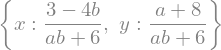

In [12]:
# Assign Symbols
x, y, a, b = sy.symbols('x, y, a, b')

# Solve the system of equations
sy.solve(
    [
        a*x - 3*y + 4, # = 0
        2*x + b*y - 1  # = 0
    ],
    [x, y]
)

This same concept can be extended to solving for a differential equation. Below, we express $x$ as some unknown function of $t$, setup the differential equation and solve it.

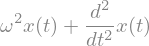

In [13]:
# Create the Variables
t = sy.Symbol('t', postive=True)
w = sy.Symbol('omega', positive=True)

# Create the Position function
x = sy.Function('x', real=True)

# Create and Print the Differential equation
de = x(t).diff(t, 2) + w**2 * x(t)  # = 0
de

In [14]:
# Get the Solution
sy.dsolve(de)

### The Laplace Transform

To avoid re-inventing the wheel, I will point you to the [Dynamics and Controls - Laplace Transform Introduction](https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/3_Linear_systems/Laplace%20transforms.html#Laplace-transforms-in-SymPy) to begin this section. Instead, I will recreate the first few lines of a [Table of Laplace Transforms](http://tutorial.math.lamar.edu/Classes/DE/Laplace_Table.aspx).

Now, I do not want to type out `sy.laplace_transform` and `sy.inverse_laplace_transform` everytime, so I will just import them below with a shorter, simpler name.

In [15]:
# Import the Laplace Transforms
from sympy import laplace_transform as L, inverse_laplace_transform as invL

# Define the Symbols needed
s, t = sy.symbols('s t')
a    = sy.Symbol('a', real=True, positive=True)

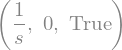

In [16]:
# Do the Laplace Transform of 1
display(L(1, t, s))

# Display the same without conditions
display(L(1, t, s, noconds=True))

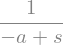

In [17]:
# Do the Laplace Transform of exp(a t)
L(sy.exp(a*t), t, s, noconds=True)

In [18]:
# Do the Laplace Transform of t^n
n = sy.Symbol('n', integer=True, positive=True)
L(t**n, t, s, noconds=True)

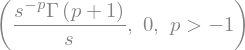

In [19]:
# Do the Laplace Transform of t^p, p > -1
p = sy.Symbol('p', real=True)
L(t**p, t, s)

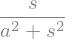

In [20]:
# Do the Laplace Transform of cos(a t)
L(sy.cos(a*t), t, s, noconds=True)

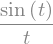

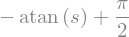

In [21]:
# Show the integral of sinc(a x) = sin(a x)/(a x) directly
f = sy.sin(t)/(t)
display(f)

# Show the Definite integral of f from 0 to inf
display(f.integrate((t, 0, sy.oo)))

# Get the Laplace Transform
F = L(f, t, s, noconds=True)
display(F)

# Do the Integral with the Laplace Transform
display(sy.lambdify((s), F, 'numpy')(0))

## Assignment

Your assignment is to take a problem from another class for which you had to use the Laplace Transform, describe it in the text cell below, then get the Laplace Transform of the equation using Sympy in the cell below that.